# Random Forest

## Import libraries

In [3]:
# Sirve para actualizar el modulo despues de haber cambiado algo en el codigo de los modulos importados
%load_ext autoreload
%autoreload 2

In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from seaborn import violinplot
%matplotlib inline
from sklearn.linear_model import LogisticRegression #Importamos el modelo
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

In [2]:
# Modulos propios del proyecto que se encuentran en el directorio src
from src.utils.paths import data_dir
from src.visualization.word_cloud import words_cloud
from src.utils.paths import references_dir
from src.utils.metrics import display_and_plot_all_metrics

## Set up

In [4]:
# Configuracion de opciones

# Configuramos para que muestre siempre todas las columnas disponibles
pd.options.display.max_columns = None

# Cambio del tamaño de los plots para seaborn
sns.set(rc={'figure.figsize':(10,5)})

# Definimos el color para los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

## Read Data

In [5]:
# Obtenemos la ruta de los csv's que vamos a utilizar
WINES_FINAL_CSV_PATH = data_dir("processed", "df_wine_final.csv")

print(f"{WINES_FINAL_CSV_PATH}")

c:\Users\cvigo\data-projects\proyecto-final-vinos\vinos-corderhouse\data\processed\df_wine_final.csv


In [6]:
df_wines = pd.read_csv(WINES_FINAL_CSV_PATH)

In [7]:
df_wines.sample(10)

,PC1,PC2,PC5,PC6,PC7,quality_low,style
3023,-0.027474,0.065771,-0.036132,-0.227414,-0.047156,0,1
864,-0.027760,-0.060236,-0.365616,0.048552,-0.442487,1,1
3798,-0.053540,-0.303786,-0.135387,-0.122338,0.160875,0,1
3490,0.382094,-0.314011,-0.195178,0.241337,0.233575,0,1
962,0.224627,-0.138197,-0.141333,0.049944,-0.065597,0,1
2290,0.085500,-0.101033,0.111654,-0.119887,-0.026477,0,1
286,-0.125002,0.507936,0.286850,0.000322,-0.082033,0,2
375,-0.284891,0.469603,0.376732,0.033087,-0.293207,1,2
4975,0.039861,-0.034154,-0.312539,0.173077,0.027666,0,1
1181,0.829728,0.056449,0.022513,0.222507,-0.035612,1,1


# Preparamos los datos

In [8]:
#Seperamos en X e y
#Elimino de mi dataset la variable a predecir
X = df_wines.drop(columns=["quality_low"])
y = df_wines.quality_low #Defino el Target

In [9]:
# Me quedo con 30% para test (validación) y 70% para train (entrenamiento)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [10]:
X_train.shape, X_test.shape

((3509, 6), (1504, 6))

# Regresión Logistica

In [11]:
# Paso 4: Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

In [12]:
# Paso 5: Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X,y)

LogisticRegression()

In [16]:
y_test_pred = regresion_logistica.predict(X_test)

# Metricas: 

### Metricas calculadas

,roc_auc,accuracy,precision,f1,recall
value,0.78,0.73,0.63,0.52,0.45


### Grafico de confusion matrix: 

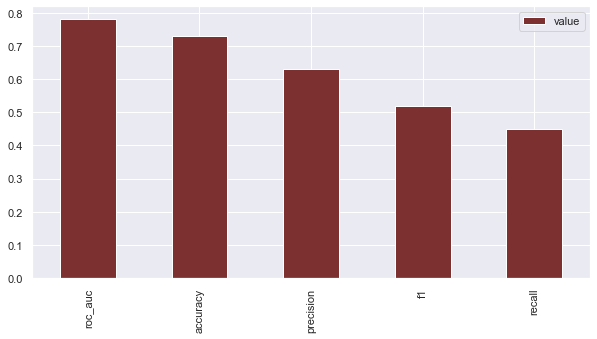

<Figure size 720x720 with 0 Axes>

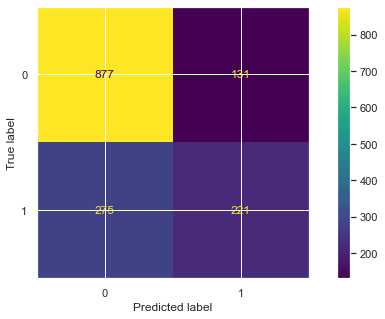

### Grafico de roc: 

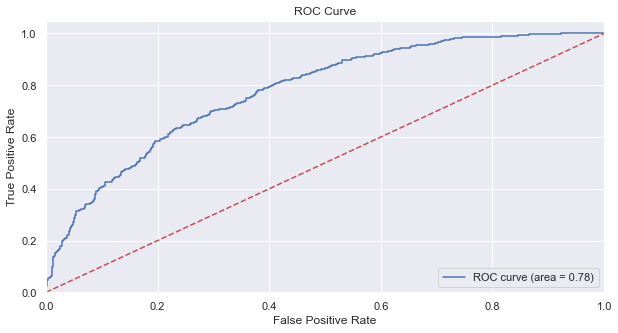

In [17]:
display_and_plot_all_metrics(regresion_logistica, X_test, y_test, y_test_pred)

# Hypertuning de Parámetros

In [18]:
# Hyperparametros

hyperparameters = { 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [19]:
# creamos el modelo
model_2 = LogisticRegression()

In [20]:
# creamos el modelo
clf =GridSearchCV(model_2,param_grid=hyperparameters)


In [21]:
#Entrenamos el modelo 
best_model = clf.fit(X_train, y_train)

In [22]:
y_test_pred = clf.predict(X_test)


In [23]:
# Mostramos los mejores parametros
best_model.best_estimator_.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [24]:
best_model.best_estimator_

LogisticRegression(solver='liblinear')

# Metricas: 

### Metricas calculadas

,roc_auc,accuracy,precision,f1,recall
value,0.77,0.73,0.63,0.52,0.44


### Grafico de confusion matrix: 

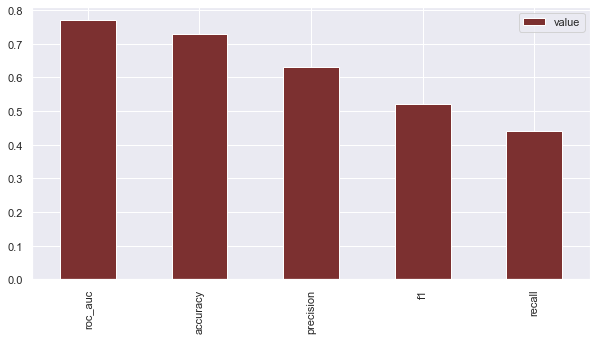

<Figure size 720x720 with 0 Axes>

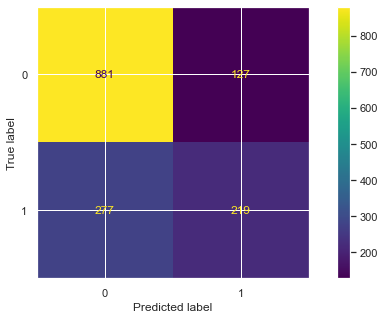

### Grafico de roc: 

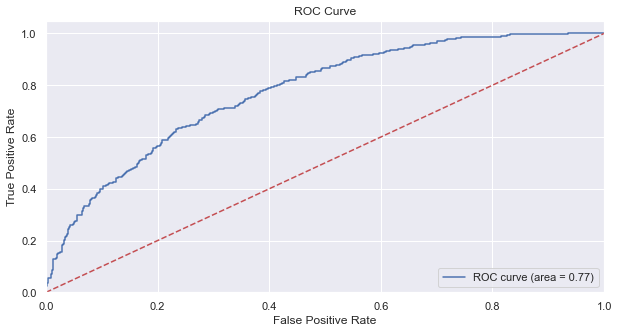

In [25]:
display_and_plot_all_metrics(clf,X_test,y_test,y_test_pred)